### Logistics Regression Multiclass classification

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("iris.csv")

In [6]:
data.drop(columns="Unnamed: 0", inplace=True)

In [8]:
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [10]:
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [12]:
data["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

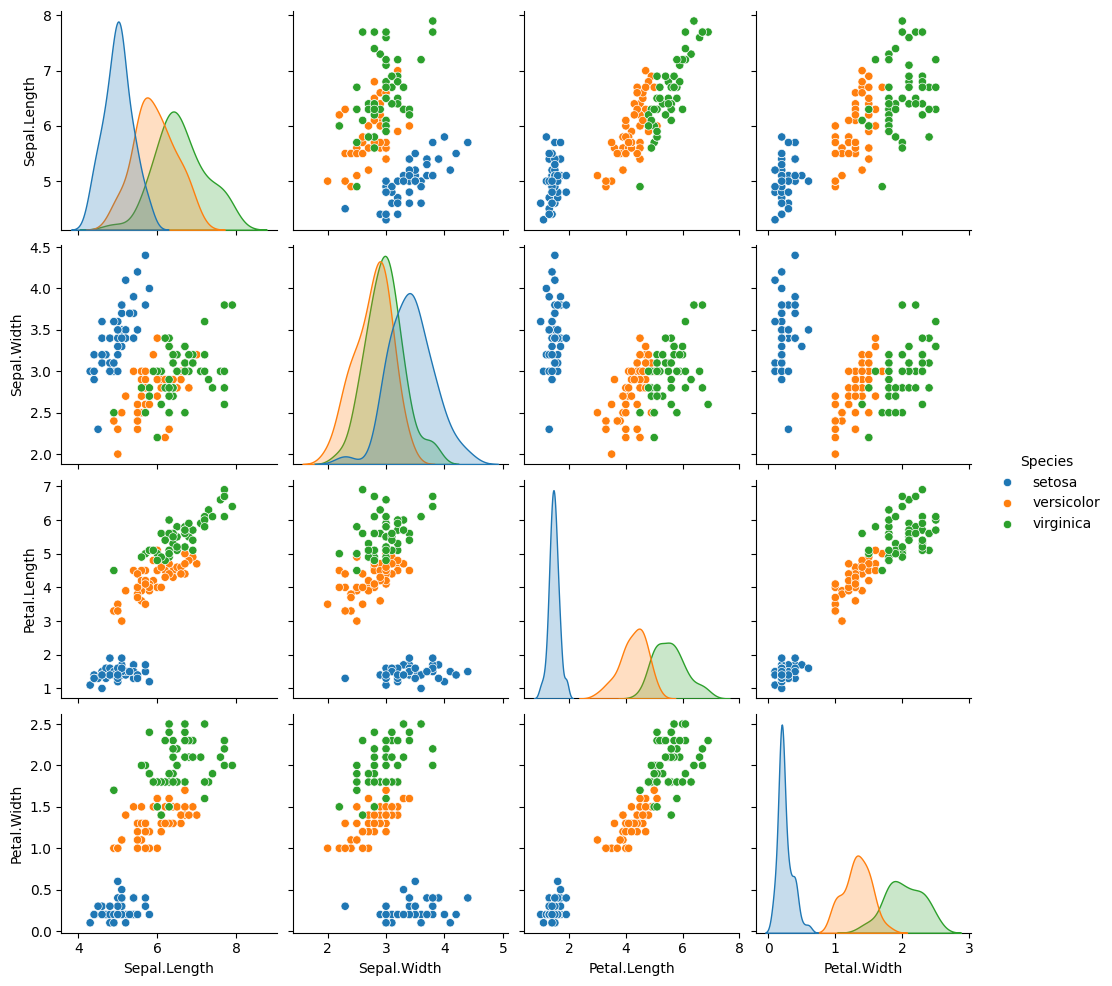

In [14]:
sns.pairplot(data=data,hue="Species")
plt.show()

In [16]:
# sepal Length & sepal Width are very overlapping each other its difficult to differentiate 
#we can easily differetiate petal length and petal width
#it is beneficial to avoid the sepal width but its a part of feature scalling 

In [18]:
X= data.iloc[:,:-1]
Y=data["Species"]

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()

In [34]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr2=LogisticRegression()
lr2.fit(X_train,Y_train)

LogisticRegression()

In [44]:
predict=lr2.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [48]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



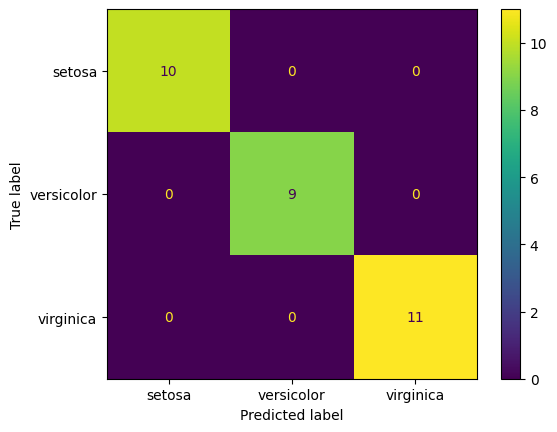

In [50]:
ConfusionMatrixDisplay.from_predictions(Y_test,predict)

### OVR

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression(multi_class="ovr")
lr.fit(X_train,Y_train)

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [57]:
lr.score(X_test, Y_test)*100

96.66666666666667

### Multinominal 

In [60]:
lr1=LogisticRegression(multi_class="multinomial")
lr1.fit(X_train,Y_train)

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [62]:
lr1.score(X_test,Y_test)*100

100.0